<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


import numpy as np
import datetime

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
oil_price_df=pd.read_csv('Dữ liệu Lịch sử Hợp Đồng Tương Lai Dầu Thô WTI.csv', index_col=0, parse_dates=True)
exchange_rate_df=pd.read_csv('Dữ liệu Lịch sử USD_VND.csv', index_col=0, parse_dates=True)
gold_price_df=pd.read_csv('Dữ liệu Lịch sử Hợp đồng Tương lai Vàng.csv', index_col=0, parse_dates=True)
vnindex_df=pd.read_csv('Dữ liệu Lịch sử VN Index.csv', index_col=0, parse_dates=True)
sp500_df=pd.read_csv('Dữ liệu Lịch sử S&P 500.csv', index_col=0, parse_dates=True)

In [4]:
vnindex_df.count()

Lần cuối      3344
Mở            3344
Cao           3344
Thấp          3344
KL            3344
% Thay đổi    3344
dtype: int64

In [5]:
oil_price_df.head(5)

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2009-02-01,46.34,43.72,46.74,41.05,184.68K,3.90%
2009-05-01,48.81,47.04,49.28,45.56,258.76K,5.33%
2009-06-01,48.58,48.40,50.47,47.60,331.31K,-0.47%
2009-07-01,42.63,48.41,49.09,42.41,306.26K,-12.25%
2009-08-01,41.70,42.63,43.63,40.54,312.49K,-2.18%


In [6]:
exchange_rate_df

,Lần cuối,Mở,Cao,Thấp,% Thay đổi
Ngày,,,,,
2009-01-01,"17,483.0","17,480.0","17,483.0","17,480.0",0.00%
2009-02-01,"17,479.0","17,420.0","17,535.0","17,400.0",-0.02%
2009-05-01,"17,472.0","17,480.0","17,540.0","17,400.0",-0.04%
2009-06-01,"17,477.5","17,400.0","17,531.5","17,400.0",0.03%
2009-07-01,"17,478.5","17,400.0","17,532.5","17,400.0",0.01%
...,...,...,...,...,...
2022-05-25,"23,190.0","23,208.0","23,215.0","23,170.0",-0.09%
2022-05-26,"23,205.0","23,200.0","23,215.0","23,195.0",0.06%
2022-05-27,"23,195.0","23,210.0","23,210.0","23,188.0",-0.04%


In [7]:
gold_price_df.sort_index(axis=0, ascending=True, inplace=True)

In [8]:
gold_price_df

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2009-01-04,926.10,918.60,932.50,916.90,3.66K,0.38%
2009-01-05,887.60,884.00,888.50,881.50,0.51K,-0.35%
2009-01-06,978.60,978.80,988.10,973.00,2.88K,-0.02%
2009-01-07,941.00,929.30,944.20,928.00,0.09K,1.50%
2009-01-09,954.70,954.20,956.50,948.70,0.02K,0.32%
...,...,...,...,...,...,...
2022-11-04,"1,955.00","1,957.10","1,981.20","1,949.90",5.74K,0.14%
2022-11-05,"1,861.00","1,844.90","1,864.50","1,838.00",60.05K,0.68%
2022-12-01,"1,833.70","1,827.10","1,834.00","1,820.80",3.28K,0.50%


In [9]:
vnindex_df

,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,
2009-02-01,313.34,312.49,313.34,312.18,5.63K,-0.72%
2009-05-01,311.91,308.77,311.91,308.25,7.92K,-0.46%
2009-06-01,314.04,312.91,315.02,312.88,12.97K,0.68%
2009-07-01,319.58,320.40,322.59,319.29,14.75K,1.76%
2009-08-01,314.15,315.92,318.79,313.04,14.94K,-1.70%
...,...,...,...,...,...,...
2022-05-25,"1,268.43","1,233.38","1,268.43","1,233.38",655.24K,2.84%
2022-05-26,"1,268.57","1,268.43","1,278.11","1,261.55",541.91K,0.01%
2022-05-27,"1,285.45","1,268.57","1,286.99","1,268.57",607.22K,1.33%


In [10]:
exchange_rate_df[['Lần cuối']]

,Lần cuối
Ngày,
2009-01-01,"17,483.0"
2009-02-01,"17,479.0"
2009-05-01,"17,472.0"
2009-06-01,"17,477.5"
2009-07-01,"17,478.5"
...,...
2022-05-25,"23,190.0"
2022-05-26,"23,205.0"
2022-05-27,"23,195.0"


In [11]:
df_arr = [exchange_rate_df, oil_price_df, gold_price_df, vnindex_df, sp500_df]
df_name = ['Exchange Rate', 'Oil price', 'Gold price', 'VN Index', 'S&P500']
mindate = exchange_rate_df.index.min()
maxdate = datetime.datetime.strptime('2022-05-31', '%Y-%m-%d')
# maxdate = exchange_rate_df.index.max()
index = pd.date_range(start=mindate, end=maxdate, freq='D')

df = pd.DataFrame(index=index)
# df = exchange_rate_df[['Lần cuối']]
# df.rename(columns={'Lần cuối': df_name[0]}, inplace=True)
for index in range(0, len(df_arr), 1):
    dataframe = df_arr[index]
    # df.join(dataframe, how='outer')
    df = pd.concat([df, dataframe[['Lần cuối']]], axis=1)
    df.rename(columns={'Lần cuối': df_name[index]}, inplace=True)

In [12]:
pd.date_range(start=mindate, end=maxdate, freq='D')

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
               '2022-05-30', '2022-05-31'],
              dtype='datetime64[ns]', length=4899, freq='D')

In [13]:
df.isna().sum()

Exchange Rate    1448
Oil price        1445
Gold price       1437
VN Index         1580
S&P500           1548
dtype: int64

In [14]:
df

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2009-01-01,"17,483.0",NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN,NaN
2009-01-03,NaN,NaN,NaN,NaN,NaN
2009-01-04,"17,755.0",48.39,926.10,289.52,811.08
2009-01-05,"17,781.5",53.20,887.60,NaN,877.52
...,...,...,...,...,...
2022-11-04,NaN,94.29,"1,955.00",NaN,"4,412.53"
2022-11-05,"23,050.0",105.71,"1,861.00","1,301.53","3,935.18"
2022-12-01,"22,698.0",82.64,"1,833.70","1,510.51","4,726.35"
2022-12-04,"22,888.0",100.60,"1,983.00","1,455.25","4,397.45"


In [15]:
df = df.replace(',','', regex=True)

df = df.replace('%','', regex=True)


In [16]:
for col in df.columns:
    df[col] = df[col].astype(np.float32)

In [17]:
df = df.interpolate(method='linear', axis=0).ffill().bfill()


In [18]:
df

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2009-01-01,17483.000000,48.389999,926.099976,289.519989,811.080017
2009-01-02,17573.666016,48.389999,926.099976,289.519989,811.080017
2009-01-03,17664.333984,48.389999,926.099976,289.519989,811.080017
2009-01-04,17755.000000,48.389999,926.099976,289.519989,811.080017
2009-01-05,17781.500000,53.200001,887.599976,357.974976,877.520020
...,...,...,...,...,...
2022-11-04,22961.500000,94.290001,1955.000000,1384.035034,4412.529785
2022-11-05,23050.000000,105.709999,1861.000000,1301.530029,3935.179932
2022-12-01,22698.000000,82.639999,1833.699951,1510.510010,4726.350098
2022-12-04,22888.000000,100.599998,1983.000000,1455.250000,4397.450195


In [19]:
df.columns

Index(['Exchange Rate', 'Oil price', 'Gold price', 'VN Index', 'S&P500'], dtype='object')

In [20]:
df = df[df.index >= datetime.datetime.strptime('2012-01-01', '%Y-%m-%d') ] 
df = df[df.index < datetime.datetime.strptime('2022-06-01', '%Y-%m-%d') ] 

In [21]:
df

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-01,21016.500000,98.016670,1686.666626,377.630005,1301.926636
2012-01-02,21008.000000,97.610001,1747.099976,390.670013,1324.089966
2012-01-03,20845.000000,108.839996,1721.099976,427.950012,1374.089966
2012-01-04,20855.000000,107.500000,1691.399902,428.233337,1389.954956
2012-01-05,20865.000000,106.160004,1661.699951,428.516663,1405.819946
...,...,...,...,...,...
2022-05-27,23195.000000,115.070000,1857.300049,1285.449951,4158.240234
2022-05-28,23188.666016,115.339996,1852.475098,1288.273315,4151.717773
2022-05-29,23182.333984,115.610001,1847.650024,1291.096680,4145.195312
2022-05-30,23176.000000,117.610001,1855.400024,1293.920044,4138.672363


In [22]:
df.index = pd.DatetimeIndex(df.index).to_period(freq='D')

In [23]:
# ds = df[df.index > '2021-01-01']

In [24]:
# df=df.resample('1D').mean()

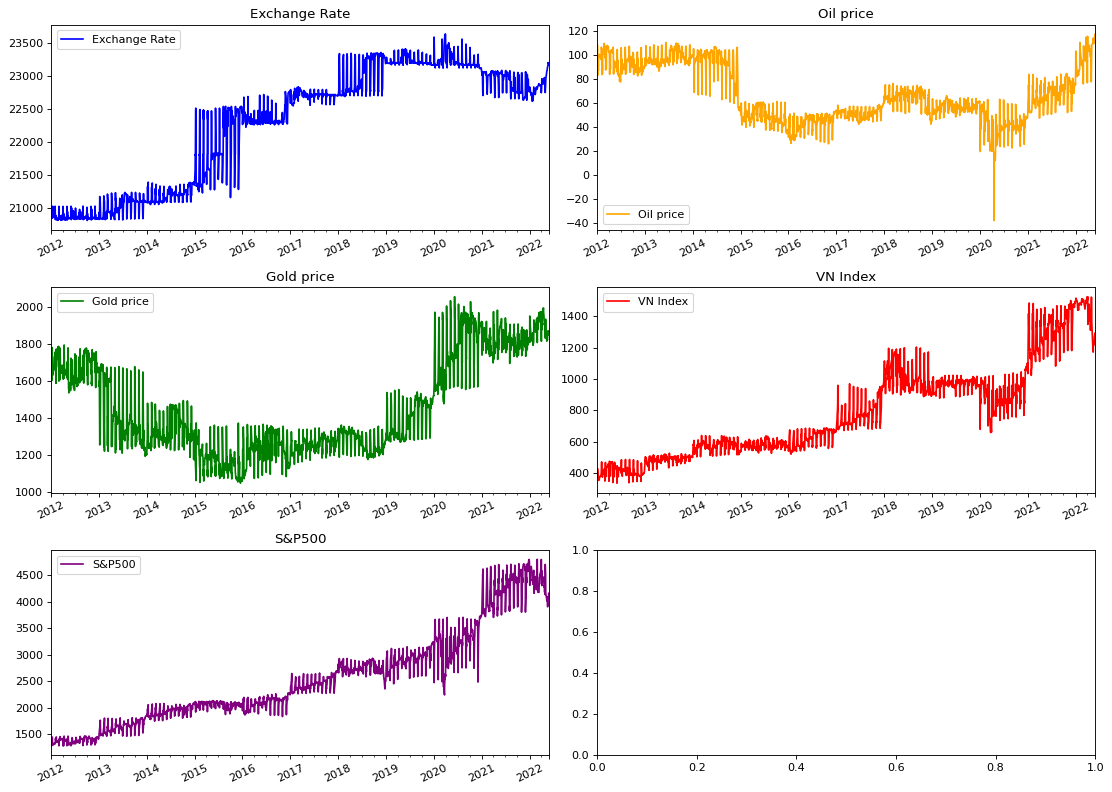

In [25]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    # print('feature size ', feature_size)
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        # print(i//2, i%2)
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

In [26]:
df.index

PeriodIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
             '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
             '2012-01-09', '2012-01-10',
             ...
             '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
             '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
             '2022-05-30', '2022-05-31'],
            dtype='period[D]', length=3804)

<AxesSubplot:>

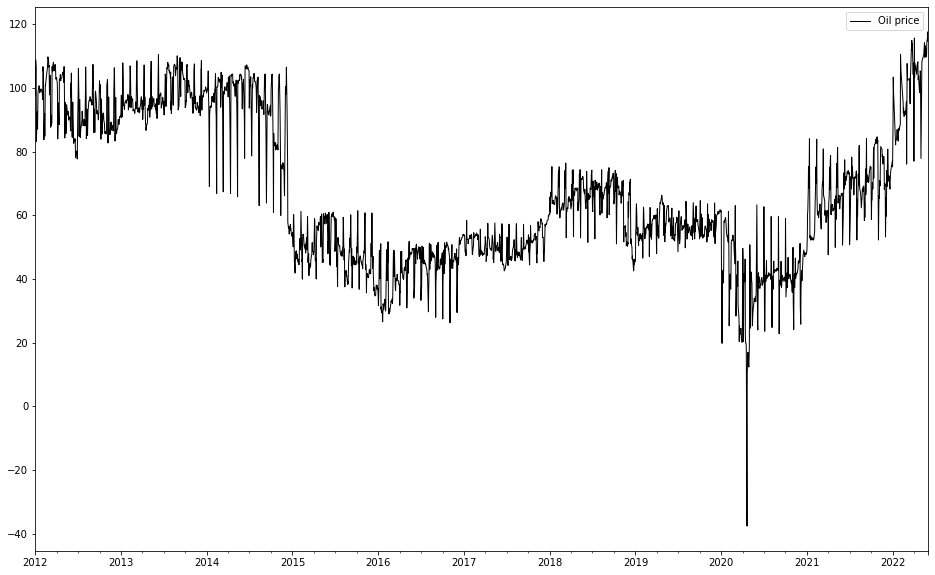

In [27]:
df[['Oil price']].plot(color='black', figsize=(16, 10), linewidth=1)


<AxesSubplot:>

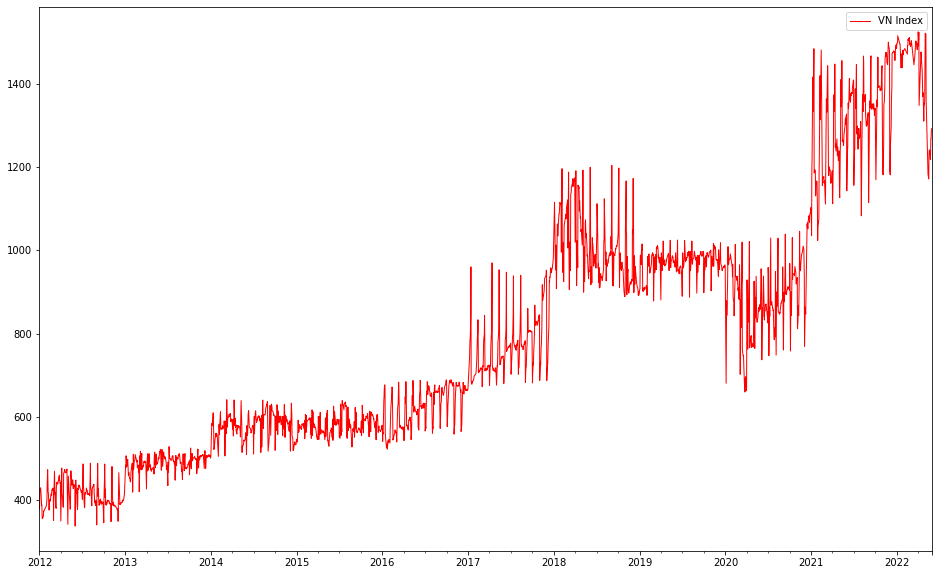

In [28]:
df[['VN Index']].plot(color='red', figsize=(16, 10), linewidth=1)


<AxesSubplot:>

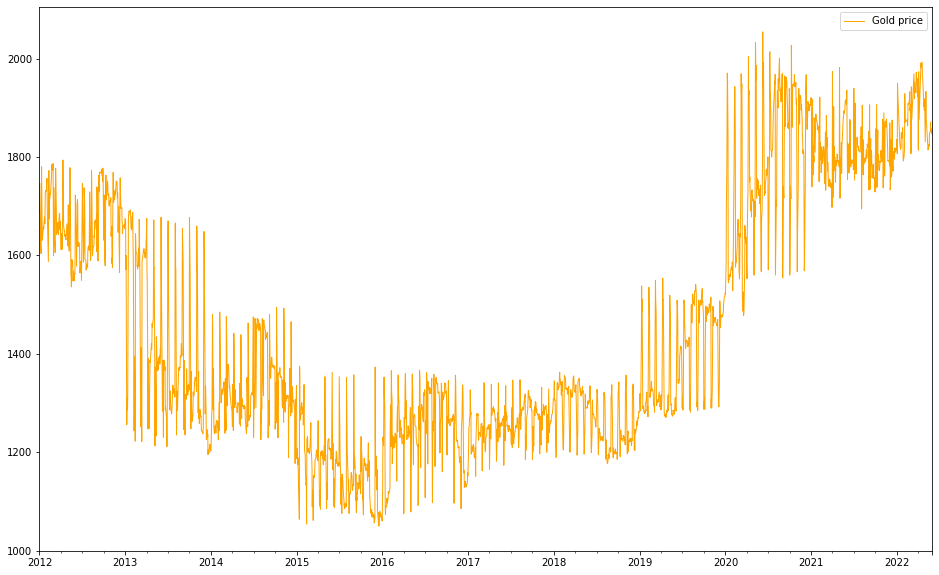

In [29]:
df[['Gold price']].plot(color='orange', figsize=(16, 10), linewidth=1)


<AxesSubplot:>

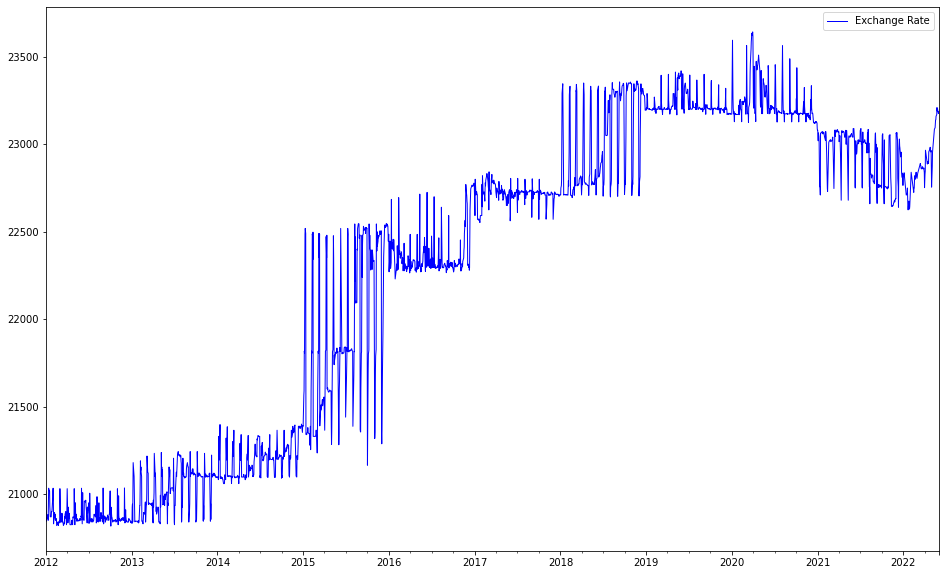

In [30]:
df[['Exchange Rate']].plot(color='blue', figsize=(16, 10), linewidth=1)

<AxesSubplot:>

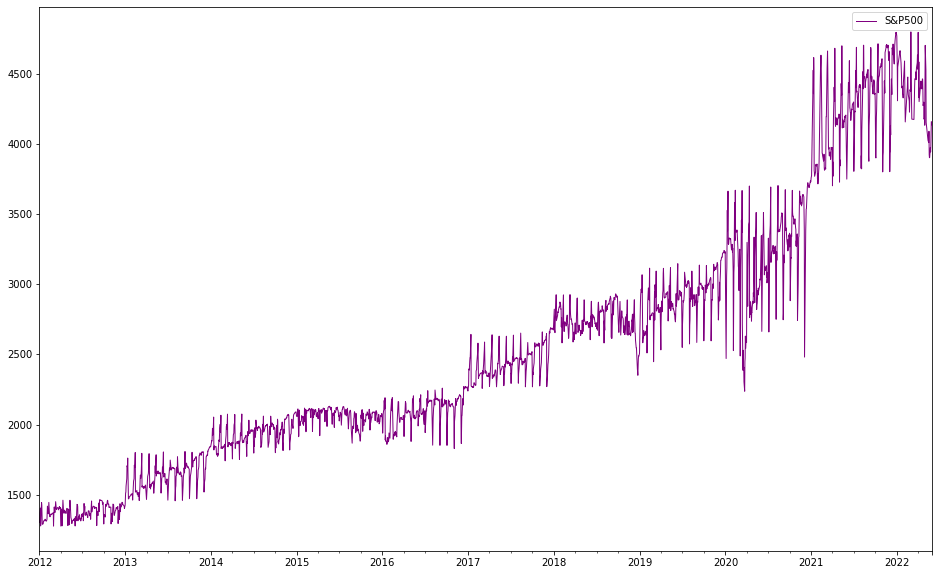

In [31]:
df[['S&P500']].plot(color='purple', figsize=(16, 10), linewidth=1)

<AxesSubplot:>

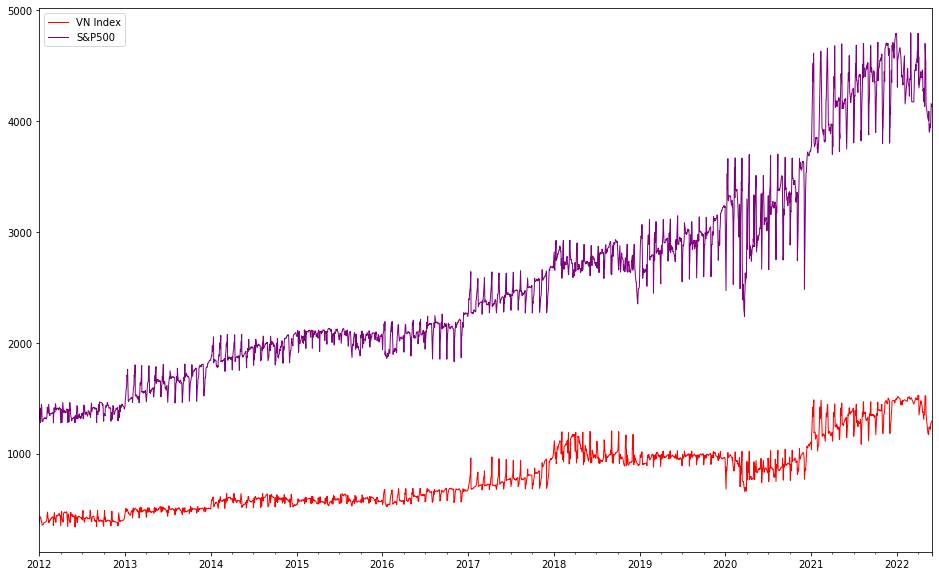

In [32]:
df[['VN Index', 'S&P500']].plot(color=['red', 'purple'], figsize=(16, 10), linewidth=1)

In [33]:
copy = df.copy()
copy['Exchange Rate'] = copy['Exchange Rate']/500

<AxesSubplot:>

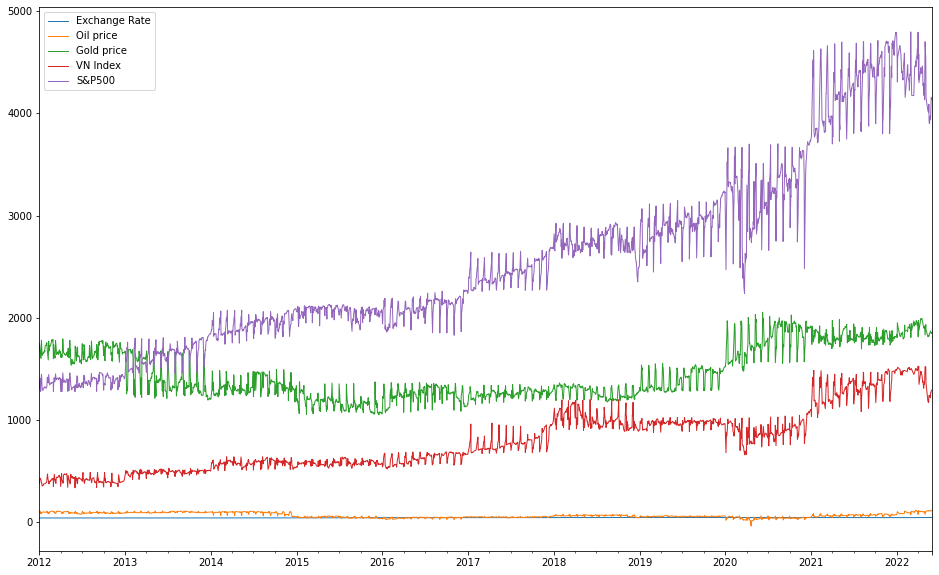

In [34]:
copy.plot(figsize=(16, 10), linewidth=1)

Giả thuyết rỗng - Chuỗi không có tính dừng

Đối thuyết - Chuỗi có tính dừng

In [35]:
def check_stationary(df):
  for i in range(len(df.columns)):
    print(f'============Testing stationary for {df.columns[i]} series ==========')
    result = adfuller(df[df.columns[i]], autolag="AIC")
    print('ADF Statistic: %d' % result[0])
    print('p-value: %f' % result[1])
    print('number of lag %f' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
      print('\t%s: %.3f' % (key, value))
    
    print(result[1])
    if result[1] > 0.05 :
      print('===> {} - Series is not Stationary'.format(df.columns[i]))
    else:
      print('{} - Series is Stationary'.format(df.columns[i]))

In [36]:
df

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-01,21016.500000,98.016670,1686.666626,377.630005,1301.926636
2012-01-02,21008.000000,97.610001,1747.099976,390.670013,1324.089966
2012-01-03,20845.000000,108.839996,1721.099976,427.950012,1374.089966
2012-01-04,20855.000000,107.500000,1691.399902,428.233337,1389.954956
2012-01-05,20865.000000,106.160004,1661.699951,428.516663,1405.819946
...,...,...,...,...,...
2022-05-27,23195.000000,115.070000,1857.300049,1285.449951,4158.240234
2022-05-28,23188.666016,115.339996,1852.475098,1288.273315,4151.717773
2022-05-29,23182.333984,115.610001,1847.650024,1291.096680,4145.195312
2022-05-30,23176.000000,117.610001,1855.400024,1293.920044,4138.672363


In [37]:
copy_df = df.copy()

In [38]:
origin_df = df.copy()

In [39]:
for i in range(len(copy_df.columns)):
    result = adfuller(copy_df[copy_df.columns[i]])
    if result[1] > 0.05 :
        copy_df[copy_df.columns[i]] = df[copy_df.columns[i]] - df[copy_df.columns[i]].shift(1)
            # copy_df.fillna(method='ffill', inplace=True)
copy_df.dropna(inplace=True)

In [40]:
copy_df

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-02,-8.500000,-0.406670,60.433350,13.040009,22.163330
2012-01-03,-163.000000,11.229996,-26.000000,37.279999,50.000000
2012-01-04,10.000000,-1.339996,-29.700073,0.283325,15.864990
2012-01-05,10.000000,-1.339996,-29.699951,0.283325,15.864990
2012-01-06,0.000000,-22.930000,-41.199951,0.283325,-127.779907
...,...,...,...,...,...
2022-05-27,-10.000000,0.980003,3.400024,16.880005,100.400146
2022-05-28,-6.333984,0.269997,-4.824951,2.823364,-6.522461
2022-05-29,-6.332031,0.270004,-4.825073,2.823364,-6.522461
2022-05-30,-6.333984,2.000000,7.750000,2.823364,-6.522949


Kiem dinh tinh dung

In [41]:
check_stationary(copy_df)

============Testing stationary for Exchange Rate series ==========
ADF Statistic: -18
p-value: 0.000000
number of lag 30.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
2.3078500954726567e-30
Exchange Rate - Series is Stationary
============Testing stationary for Oil price series ==========
ADF Statistic: -15
p-value: 0.000000
number of lag 30.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
7.90756333239814e-29
Oil price - Series is Stationary
============Testing stationary for Gold price series ==========
ADF Statistic: -19
p-value: 0.000000
number of lag 30.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
0.0
Gold price - Series is Stationary
============Testing stationary for VN Index series ==========
ADF Statistic: -16
p-value: 0.000000
number of lag 30.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
6.147921693635987e-29
VN Index - Series is Stationary
============Testing stationary for S&P500 series ==========
ADF Statistic: -16

In [42]:
copy_df.head(5)

,Exchange Rate,Oil price,Gold price,VN Index,S&P500
2012-01-02,-8.5,-0.406670,60.433350,13.040009,22.163330
2012-01-03,-163.0,11.229996,-26.000000,37.279999,50.000000
2012-01-04,10.0,-1.339996,-29.700073,0.283325,15.864990
2012-01-05,10.0,-1.339996,-29.699951,0.283325,15.864990
2012-01-06,0.0,-22.930000,-41.199951,0.283325,-127.779907


In [43]:
df = copy_df

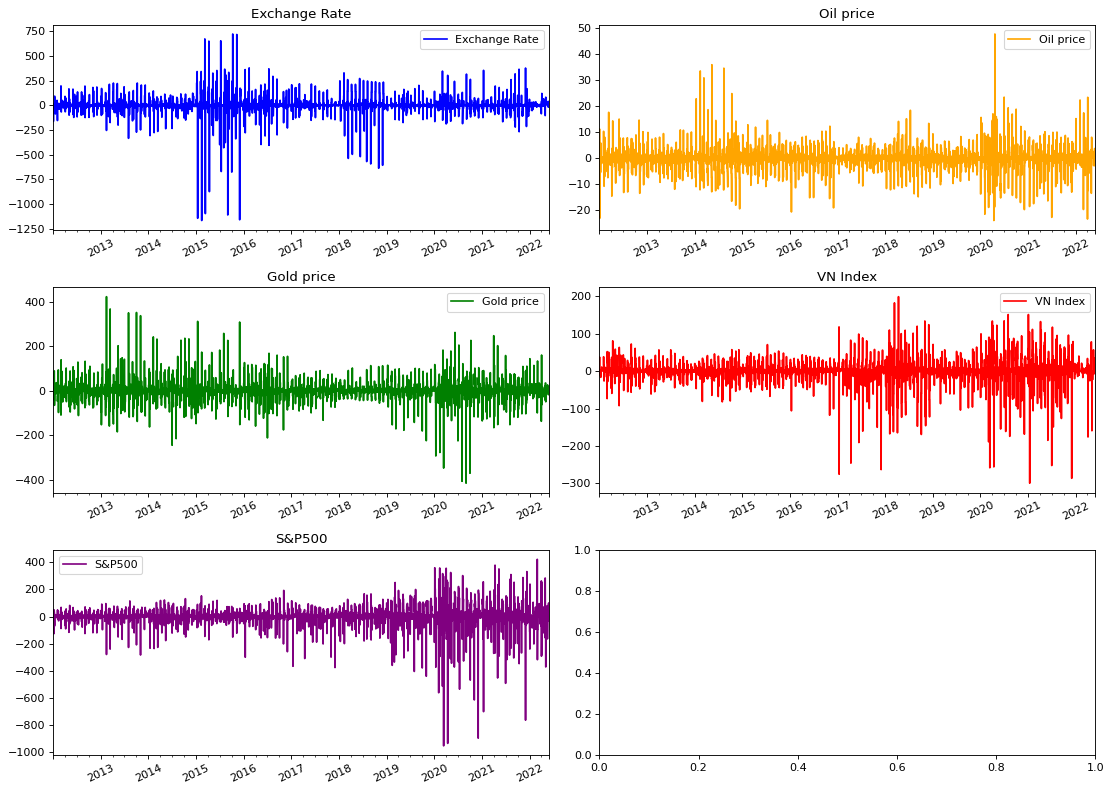

In [44]:
Visualize(df)

In [45]:
max_lags=12
y='VN Index'

In [46]:
# grangercausalitytests(df[[y,'Gold_1_diff']], max_lags, verbose=False)

In [47]:
df.columns

Index(['Exchange Rate', 'Oil price', 'Gold price', 'VN Index', 'S&P500'], dtype='object')

In [48]:
# results = grangercausalitytests(df[[y,'Oil_1_diff']], max_lags, verbose=False)
# results['Oil price'][0]['ssr_ftest'][1]

In [49]:
for y in df.columns:
    print('Causal test', y)
    for i in range(0,len(df.columns)):
        results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
        p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
        print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

Causal test Exchange Rate
Column - Exchange Rate : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - Oil price : P_Values - [0.0573, 0.0235, 0.0, 0.0003, 0.0001, 0.0006, 0.0067, 0.0043, 0.0038, 0.0098, 0.0109, 0.0021]
Column - Gold price : P_Values - [0.0045, 0.0001, 0.0003, 0.0002, 0.0, 0.0, 0.0001, 0.0003, 0.0001, 0.0001, 0.0002, 0.0005]
Column - VN Index : P_Values - [0.3893, 0.6488, 0.4618, 0.5762, 0.2373, 0.297, 0.2608, 0.0995, 0.1796, 0.0267, 0.0154, 0.0061]
Column - S&P500 : P_Values - [0.225, 0.4421, 0.4733, 0.6555, 0.1613, 0.1254, 0.1793, 0.099, 0.1478, 0.0683, 0.0879, 0.1245]
Causal test Oil price
Column - Exchange Rate : P_Values - [0.0243, 0.0939, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Oil price : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - Gold price : P_Values - [0.093, 0.0448, 0.0276, 0.065, 0.1208, 0.0001, 0.0002, 0.0005, 0.0007, 0.0013, 0.0024, 0.0044]
Column - VN Index : P_Values -

Kiểm định nhân quả Granger
với 
<br>

 Giải thuyết rỗng H0: Xt không có quan hệ nhân quả Yt
 
 Đối thuyết H1: Xt tác động nhân quả granger lên Yt

In [50]:
maxlag=5
test = 'ssr_ftest'
def grangers_causality_matrix(X_train, variables, test = 'ssr_ftest', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.max(p_values)
            dataset.loc[r,c] = str(p_values)
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
grangers_causality_matrix(df, variables = df.columns, test=test)


,Exchange Rate_x,Oil price_x,Gold price_x,VN Index_x,S&P500_x
Exchange Rate_y,"[1.0, 1.0, 1.0, 1.0, 1.0]","[0.0573, 0.0235, 0.0, 0.0003, 0.0001]","[0.0045, 0.0001, 0.0003, 0.0002, 0.0]","[0.3893, 0.6488, 0.4618, 0.5762, 0.2373]","[0.225, 0.4421, 0.4733, 0.6555, 0.1613]"
Oil price_y,"[0.0243, 0.0939, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.093, 0.0448, 0.0276, 0.065, 0.1208]","[0.5999, 0.0283, 0.0966, 0.1434, 0.0098]","[0.0013, 0.0, 0.0, 0.0, 0.0]"
Gold price_y,"[0.0362, 0.1306, 0.1643, 0.0005, 0.0013]","[0.128, 0.2019, 0.017, 0.0034, 0.0008]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.1488, 0.07, 0.0343, 0.0, 0.0]","[0.2086, 0.0004, 0.0004, 0.0, 0.0]"
VN Index_y,"[0.1469, 0.0716, 0.0004, 0.0, 0.0001]","[0.0002, 0.0003, 0.001, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.0002, 0.0003, 0.0, 0.0, 0.0]"
S&P500_y,"[0.2603, 0.4758, 0.6225, 0.7766, 0.8618]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.1495, 0.001, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]"


In [51]:
# df =df[['Exchange Rate', 'Oil price','Gold price','S&P500', 'VN Index']]
df =df[['Oil price','S&P500', 'Gold price', 'VN Index']]

In [52]:
df

,Oil price,S&P500,Gold price,VN Index
2012-01-02,-0.406670,22.163330,60.433350,13.040009
2012-01-03,11.229996,50.000000,-26.000000,37.279999
2012-01-04,-1.339996,15.864990,-29.700073,0.283325
2012-01-05,-1.339996,15.864990,-29.699951,0.283325
2012-01-06,-22.930000,-127.779907,-41.199951,0.283325
...,...,...,...,...
2022-05-27,0.980003,100.400146,3.400024,16.880005
2022-05-28,0.269997,-6.522461,-4.824951,2.823364
2022-05-29,0.270004,-6.522461,-4.825073,2.823364
2022-05-30,2.000000,-6.522949,7.750000,2.823364


In [53]:
# df_train = df[:int(0.9*(len(df)))]
# df_test = df[int(0.9*(len(df))):]
origin_df = origin_df[df.columns]
# df_train, df_test = origin_df[0:-nobs], origin_df[-nobs:]
nobs = 6
df_train = origin_df[:-nobs]
df_test = origin_df[-nobs:]

nobs = len(df_test)

# Check size
print(df_train.shape) 
print(df_test.shape)

(3798, 4)
(6, 4)


In [54]:
# df_train.shape

In [55]:
# df_test.shape

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d79bead4e9192d7fe2470a7936e4623e9ff252e1)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d88ac4002c0641b2e93fb6d35f961ea63352b6a9)

In [56]:
model = VAR(df)
# for i in range(48):
#     results = model.fit(i+1)
#     print('Order = ', i, '=========================')
#     print('AIC: ', results.aic)
#     print('BIC: ', results.bic)
#     print('\n')

In [57]:
model.select_order(20).summary()

,AIC,BIC,FPE,HQIC
0,25.62,25.62,1.333e+11,25.62
1,25.60,25.63,1.308e+11,25.61
2,25.53,25.59,1.220e+11,25.55
3,25.45,25.54,1.135e+11,25.49
4,25.43,25.54,1.102e+11,25.47
5,25.40,25.54,1.077e+11,25.45
6,25.35,25.52*,1.025e+11,25.41
7,25.33,25.53,1.006e+11,25.40
8,25.30,25.52,9.766e+10,25.38
9,25.29,25.54,9.658e+10,25.38


In [58]:
model = VAR(df)
fitted_model = model.fit(15)

In [59]:
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Jun, 2022
Time:                     08:15:10
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    25.6512
Nobs:                     3788.00    HQIC:                   25.3922
Log likelihood:          -69078.0    FPE:                9.23948e+10
AIC:                      25.2493    Det(Omega_mle):     8.66754e+10
--------------------------------------------------------------------
Results for equation Oil price
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.001345         0.064764            0.021           0.983
L1.Oil price          -0.032431         0.017441           -1.859           0.063
L1.S&P500              0.005220         0.001071    

Hàm phản ứng đẩy (Impulse Response function) mô tả cách các biến số phản ứng (thay đổi) khi xảy ra những cú sốc đối với một biến khác trên một khoảng các giá trị độ trễ (lags)

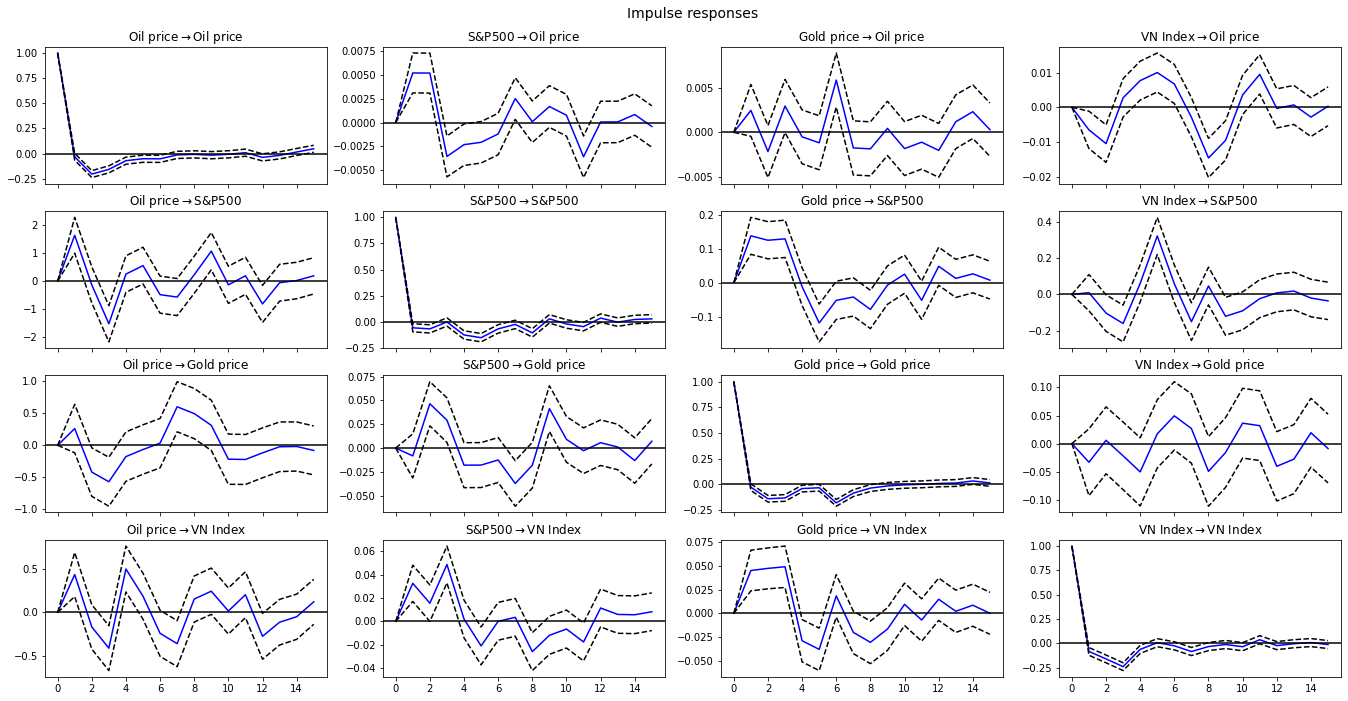

In [94]:
irf = fitted_model.irf(15)
irf.plot(figsize=(20,10))
plt.show()


In [100]:
fevd = fitted_model.fevd(20)
fevd.summary()

FEVD for Oil price
      Oil price    S&P500  Gold price  VN Index
0      1.000000  0.000000    0.000000  0.000000
1      0.992838  0.005008    0.000666  0.001489
2      0.986083  0.007561    0.001264  0.005092
3      0.982731  0.009865    0.002223  0.005181
4      0.980726  0.009987    0.002226  0.007061
5      0.977469  0.009942    0.002330  0.010259
6      0.972251  0.009899    0.006224  0.011626
7      0.970640  0.010922    0.006570  0.011868
8      0.961348  0.013230    0.006975  0.018447
9      0.958619  0.013196    0.006957  0.021228
10     0.957341  0.013770    0.007287  0.021602
11     0.953769  0.014543    0.007357  0.024331
12     0.953399  0.014519    0.007790  0.024292
13     0.953237  0.014528    0.007939  0.024296
14     0.952456  0.014545    0.008478  0.024521
15     0.952498  0.014553    0.008472  0.024478
16     0.952548  0.014542    0.008463  0.024447
17     0.952534  0.014559    0.008462  0.024445
18     0.952463  0.014574    0.008519  0.024445
19     0.952441  0.01

In [64]:
def adjust(val, length= 6): return str(val).ljust(length)

In [65]:
# model = VAR(df)
# fitted_model = model.fit(4)

Kiểm nghiệm Durbin Watson cho việc kiểm định tính tương quan chuỗi cho phần dư của mô hình 

In [66]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Oil price : 2.0
S&P500 : 2.0
Gold price : 2.0
VN Index : 2.01


In [67]:
df.index[-6:]

PeriodIndex(['2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
             '2022-05-30', '2022-05-31'],
            dtype='period[D]')

In [68]:
lag_order = fitted_model.k_ar
print(lag_order) 


15


In [69]:
import random
nobs = lag_order
# start_index = random.randint(lag_order+1, len(origin_df) - nobs-1)
start_index = len(origin_df) - lag_order
df_train = origin_df[:start_index]
df_test = origin_df[start_index:start_index+nobs]

nobs = len(df_test)

# Check size
print(df_train.shape) 
print(df_test.shape)

(3789, 4)
(15, 4)


In [70]:
# lag_order = fitted_model.k_ar
# print(lag_order)  #> 5

# Input data for forecasting
# forecast_input = df.values[-lag_order:]
forecast_input = df.values[(start_index - lag_order - 1):start_index - 1]
forecast_input

array([[ 8.0366669e+00, -5.8486816e+01,  3.4000000e+01, -8.2336426e-01],
       [ 8.0366669e+00, -5.8486328e+01,  3.4000000e+01, -8.2324219e-01],
       [ 8.0366669e+00, -5.8486816e+01,  3.4000000e+01, -8.2336426e-01],
       [ 6.3000031e+00, -3.7274023e+02, -5.0500000e+01, -1.5934998e+02],
       [ 2.7874756e-01, -1.6061035e+01, -8.5250244e+00, -2.2238770e+01],
       [ 2.7875519e-01, -1.6061523e+01, -8.5250244e+00, -2.2238770e+01],
       [ 2.7874756e-01, -1.6061035e+01, -8.5249023e+00, -2.2238770e+01],
       [ 2.7874756e-01, -1.6061523e+01, -8.5250244e+00, -2.2238647e+01],
       [ 2.7874756e-01, -1.6061035e+01, -8.5250244e+00, -2.2238770e+01],
       [ 2.7874756e-01, -1.6061279e+01, -8.5249023e+00, -2.2238770e+01],
       [ 2.7875519e-01, -1.6061279e+01, -8.5250244e+00, -2.2238770e+01],
       [ 2.7874756e-01, -1.6061279e+01, -8.5250244e+00, -2.2238770e+01],
       [ 1.2366638e+00, -5.2932129e+00,  1.8666992e+00, -3.6066895e+00],
       [ 1.2366714e+00, -5.2934570e+00,  1.8665771e

In [71]:
df[(start_index - lag_order-1):start_index-1]

,Oil price,S&P500,Gold price,VN Index
2022-05-02,8.036667,-58.486816,34.000000,-0.823364
2022-05-03,8.036667,-58.486328,34.000000,-0.823242
2022-05-04,8.036667,-58.486816,34.000000,-0.823364
2022-05-05,6.300003,-372.740234,-50.500000,-159.349976
2022-05-06,0.278748,-16.061035,-8.525024,-22.238770
2022-05-07,0.278755,-16.061523,-8.525024,-22.238770
2022-05-08,0.278748,-16.061035,-8.524902,-22.238770
2022-05-09,0.278748,-16.061523,-8.525024,-22.238647
2022-05-10,0.278748,-16.061035,-8.525024,-22.238770
2022-05-11,0.278748,-16.061279,-8.524902,-22.238770


In [72]:
# df[-(lag_order+nobs):-nobs]

In [73]:
df_test

,Oil price,S&P500,Gold price,VN Index
2022-05-17,112.400002,4088.850098,1825.400024,1228.369995
2022-05-18,109.589996,3923.679932,1822.400024,1240.760010
2022-05-19,112.209999,3900.790039,1847.800049,1241.640015
2022-05-20,113.230003,3901.360107,1848.400024,1240.709961
2022-05-21,112.250000,3925.489990,1850.233398,1233.410034
2022-05-22,111.270004,3949.620117,1852.066650,1226.109985
2022-05-23,110.290001,3973.750000,1853.900024,1218.810059
2022-05-24,109.769997,3941.479980,1871.400024,1233.380005
2022-05-25,110.330002,3978.729980,1852.500000,1268.430054
2022-05-26,114.089996,4057.840088,1853.900024,1268.569946


In [74]:
len(df_test)

15

In [75]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index, columns=df.columns + '_1d')
df_forecast

,Oil price_1d,S&P500_1d,Gold price_1d,VN Index_1d
2022-05-17,-2.357510,40.598823,10.550813,28.813668
2022-05-18,-2.147384,33.598731,8.365513,23.669696
2022-05-19,-0.735132,27.174837,12.594713,17.526178
2022-05-20,0.389178,33.410561,9.545268,20.236905
2022-05-21,0.593670,7.807733,3.938852,6.941029
2022-05-22,0.372238,6.828684,2.376604,2.465527
2022-05-23,0.407639,4.947513,0.983388,1.173831
2022-05-24,0.442722,-0.868648,-3.683248,-0.577406
2022-05-25,0.014716,-3.006339,-7.771264,-2.661138
2022-05-26,-0.286707,-9.327066,-6.783447,-5.325835


In [76]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [77]:
df_train['VN Index'].iloc[-1]

1171.95

In [79]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
# df_results.loc[:, [ 'Exchange Rate_forecast', 'Gold price_forecast', 'S&P500_forecast', 'VN Index_forecast', 'Oil price_forecast']]'
df_results

,Oil price_1d,S&P500_1d,Gold price_1d,VN Index_1d,Oil price_forecast,S&P500_forecast,Gold price_forecast,VN Index_forecast
2022-05-17,-2.357510,40.598823,10.550813,28.813668,111.842487,4048.608833,1830.950838,1200.763619
2022-05-18,-2.147384,33.598731,8.365513,23.669696,109.695103,4082.207563,1839.316351,1224.433315
2022-05-19,-0.735132,27.174837,12.594713,17.526178,108.959971,4109.382401,1851.911064,1241.959494
2022-05-20,0.389178,33.410561,9.545268,20.236905,109.349149,4142.792961,1861.456332,1262.196399
2022-05-21,0.593670,7.807733,3.938852,6.941029,109.942819,4150.600694,1865.395184,1269.137428
2022-05-22,0.372238,6.828684,2.376604,2.465527,110.315057,4157.429378,1867.771788,1271.602955
2022-05-23,0.407639,4.947513,0.983388,1.173831,110.722696,4162.376891,1868.755176,1272.776786
2022-05-24,0.442722,-0.868648,-3.683248,-0.577406,111.165418,4161.508242,1865.071927,1272.199380
2022-05-25,0.014716,-3.006339,-7.771264,-2.661138,111.180134,4158.501903,1857.300663,1269.538241
2022-05-26,-0.286707,-9.327066,-6.783447,-5.325835,110.893427,4149.174837,1850.517216,1264.212406


In [80]:
df_test

,Oil price,S&P500,Gold price,VN Index
2022-05-17,112.400002,4088.850098,1825.400024,1228.369995
2022-05-18,109.589996,3923.679932,1822.400024,1240.760010
2022-05-19,112.209999,3900.790039,1847.800049,1241.640015
2022-05-20,113.230003,3901.360107,1848.400024,1240.709961
2022-05-21,112.250000,3925.489990,1850.233398,1233.410034
2022-05-22,111.270004,3949.620117,1852.066650,1226.109985
2022-05-23,110.290001,3973.750000,1853.900024,1218.810059
2022-05-24,109.769997,3941.479980,1871.400024,1233.380005
2022-05-25,110.330002,3978.729980,1852.500000,1268.430054
2022-05-26,114.089996,4057.840088,1853.900024,1268.569946


In [81]:
df_test_1 = df_test.copy()

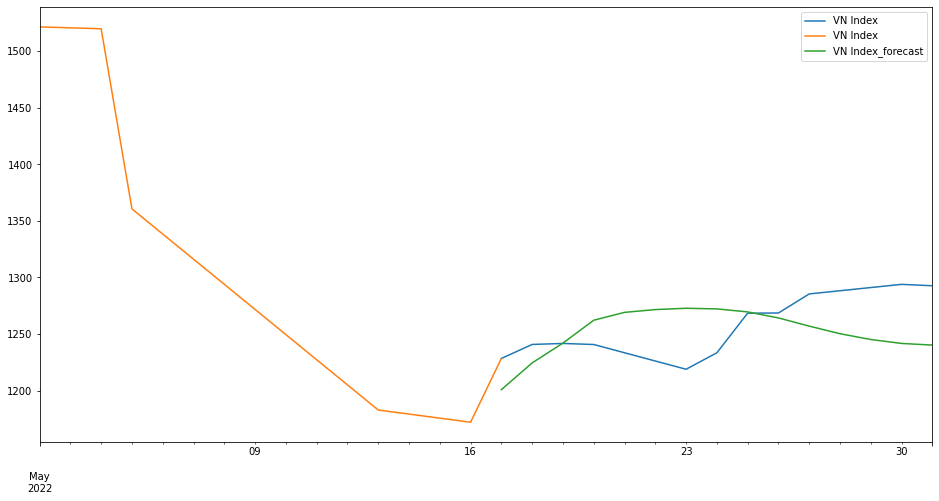

In [82]:
col = 'VN Index'
df_test['VN Index'][-nobs:].plot(legend=True)
origin_df['VN Index'][start_index-lag_order:start_index+1].plot(legend=True)

df_results[col+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

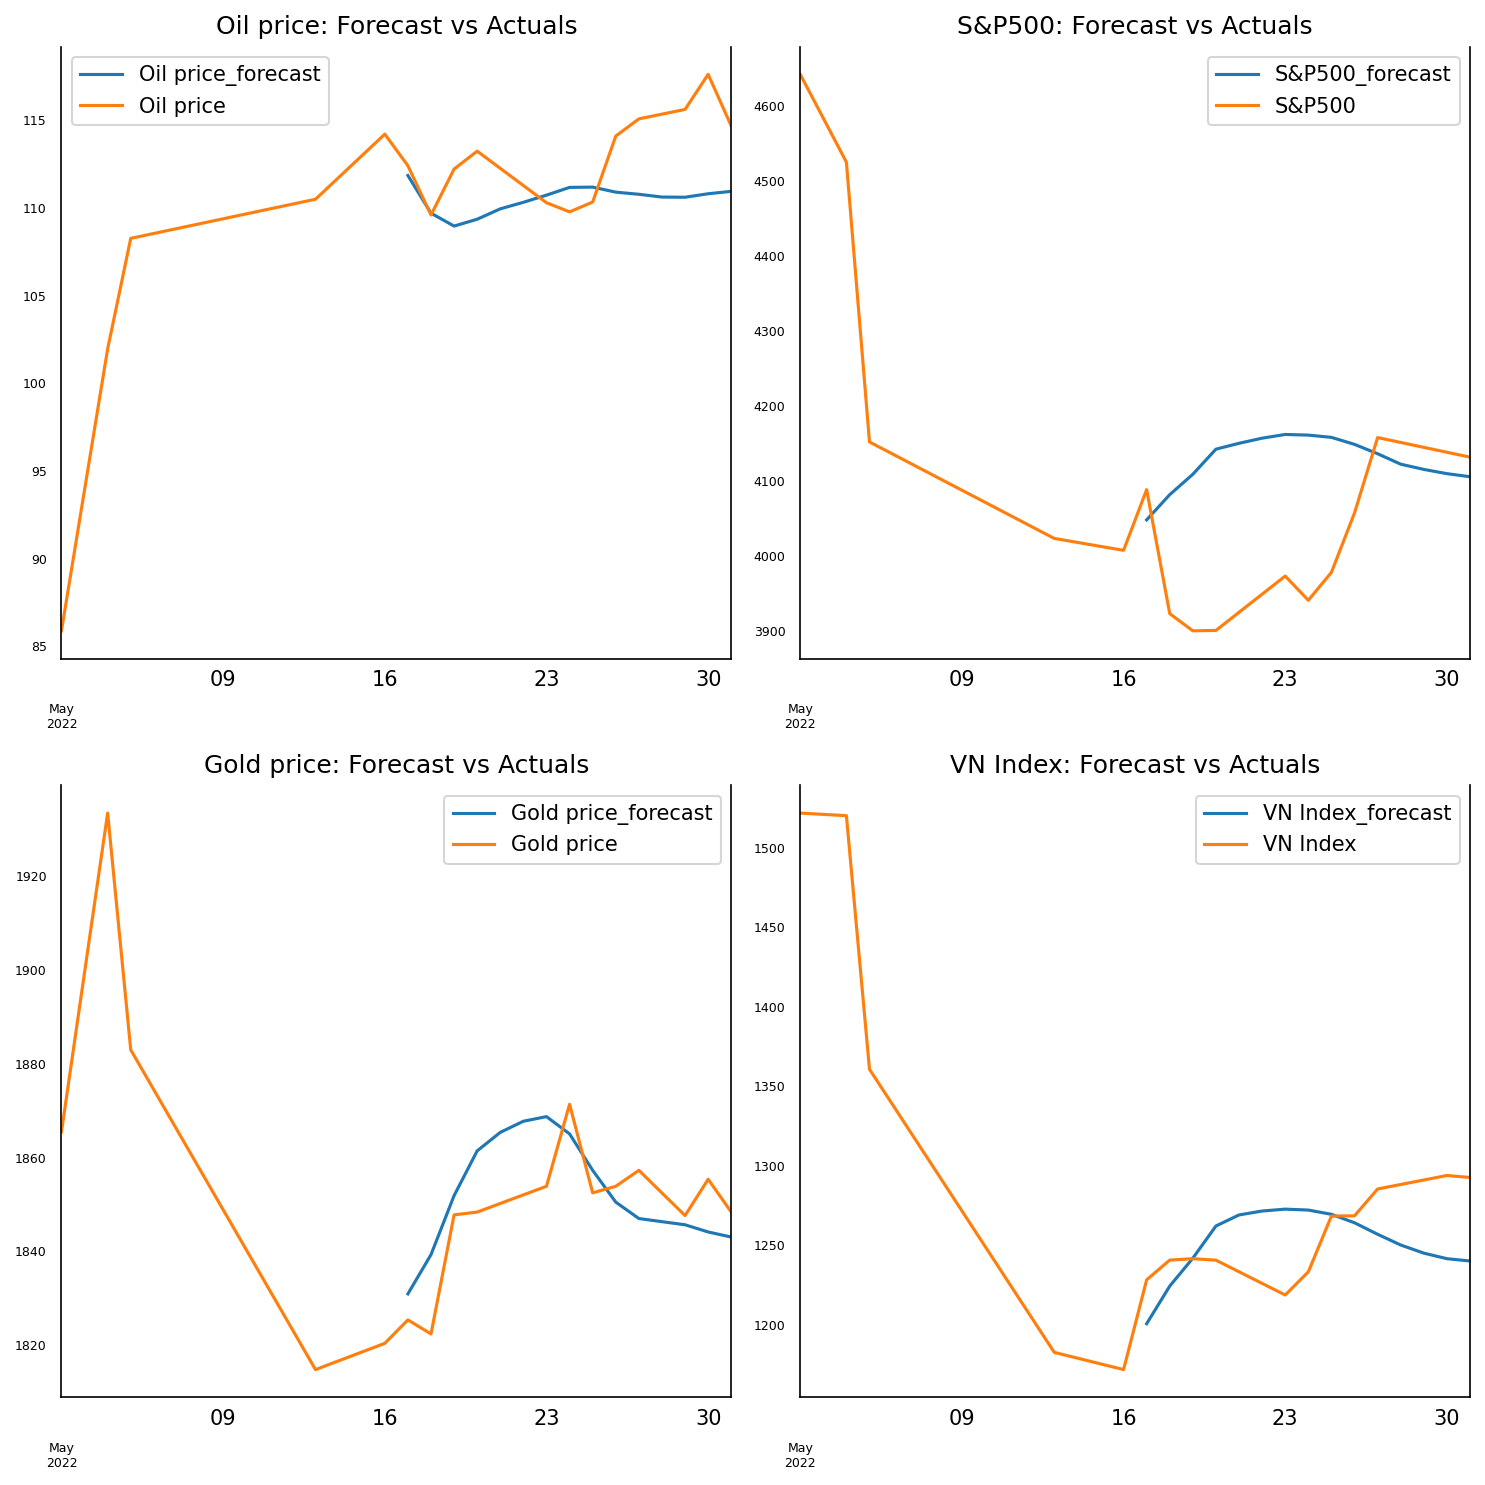

In [83]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    # df_test[col][-nobs:].plot(legend=True, ax=ax)
    origin_df[col][start_index-lag_order:start_index+nobs].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [84]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [85]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(df_results['VN Index_forecast'].values, df_test['VN Index'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: VN Index
mape   :  0.0245
me     :  -4.5728
mae    :  30.8288
mpe    :  -0.0031
rmse   :  35.7143
corr   :  -0.1228
minmax :  0.0242


C:\Users\ngthn\AppData\Local\Temp\ipykernel_9128\2139281694.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\ngthn\AppData\Local\Temp\ipykernel_9128\2139281694.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [86]:
for col in ['VN Index','S&P500', 'Oil price', 'Gold price']:
    print(f'\nForecast Accuracy of: {col}')
    accuracy_prod = forecast_accuracy(df_results[f'{col}_forecast'].values, df_test[col])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: VN Index
mape   :  0.0245
me     :  -4.5728
mae    :  30.8288
mpe    :  -0.0031
rmse   :  35.7143
corr   :  -0.1228
minmax :  0.0242

Forecast Accuracy of: S&P500
mape   :  0.0319
me     :  103.1022
mae    :  126.3958
mpe    :  0.0263
rmse   :  152.9098
corr   :  -0.3204
minmax :  0.0305

Forecast Accuracy of: Oil price
mape   :  0.0242
me     :  -2.3955
mae    :  2.7666
mpe    :  -0.0208
rmse   :  3.3802
corr   :  0.1067
minmax :  0.0242

Forecast Accuracy of: Gold price
mape   :  0.0049
me     :  3.0333
mae    :  8.9877
mpe    :  0.0017
rmse   :  10.2568
corr   :  0.6216
minmax :  0.0048


C:\Users\ngthn\AppData\Local\Temp\ipykernel_9128\2139281694.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\ngthn\AppData\Local\Temp\ipykernel_9128\2139281694.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [87]:
fitted_model.save('VAR_vnindex.pkl')

In [88]:
# def show_graph(df1,df2,title):
#     data = pd.concat([df1, df2])
#     data.reset_index(inplace=True, drop=True)
#     for col in data.columns:
#         if col.lower().startswith('pred'):
#             data[col].plot(label=col,linestyle="dotted")
#         else:
#             data[col].plot(label=col)
#     plt.title(title)
#     plt.legend()
#     plt.show()


In [89]:
# from statsmodels.tsa.statespace.varmax import VARMAX
# from random import random

# def VARMA_model(train,test):
#     # fit model
#     model = VARMAX(train, order=(1, 2))
#     model_fit = model.fit(disp=False)
#     # make prediction
#     yhat = model_fit.forecast(steps=len(test))
#     res=pd.DataFrame({"Pred1":yhat['Stock_1_diff'], "Pred2":yhat['Act2'], 
#                       "Act1":test["Stock_1_diff"].values, "Act2":test["Act2"].values})
#     return res

# df_ret = VARMA_model(df_train, df_test)
# show_graph(df_train, df_ret, "Vector Autoregression Moving-Average (VARMA)")